In [86]:
import rosbag
from geometry_msgs.msg import Point
import pandas as pd
import matplotlib.pyplot as plt
import rospy
import numpy as np

In [87]:
bag = rosbag.Bag('/home/uware/rosbags/_2022-02-21-11-12-03.bag')
topic = '/tf'

rows = []

for topic, msg, t in bag.read_messages(topics=topic):
    
    time = t
    distance = msg.transforms[0].transform.translation.z

    # print(msg.transforms[0].header.stamp.secs, msg.transforms[0].header.stamp.nsecs)
    
    # create row
    row={'time': time.to_sec(), 'distance': distance}
    rows.append(row)

df = pd.DataFrame.from_records(rows)
# df

In [88]:
# calculate relative time in seconds by finding the difference between time instances
df['relative_time'] =  df.loc[0:, 'time'] - df.at[0, 'time']
df = df.drop(columns=['time'])
df

,distance,relative_time
0,1.540828,0.000000
1,1.544104,0.100539
2,1.560746,0.190374
3,1.584294,0.282790
4,1.586674,0.378646
...,...,...
566,0.525557,26.838087
567,0.522651,26.873688
568,0.526820,26.908928
569,0.525514,26.945567


<AxesSubplot:xlabel='relative_time'>

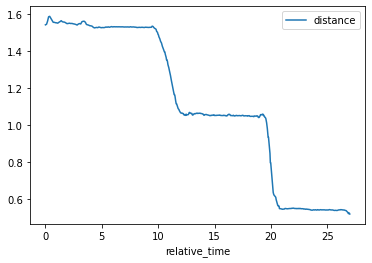

In [89]:
# initial graph
df.plot(x='relative_time', y='distance')

### by percentage change

In [90]:
df_filtered_by_change = df.loc[df.distance.pct_change(periods=2)>.000001]

In [91]:
df_filtered_by_change

,distance,relative_time
2,1.560746,0.190374
3,1.584294,0.282790
4,1.586674,0.378646
10,1.554982,1.205070
11,1.558417,1.301386
...,...,...
549,0.544580,26.204765
550,0.544948,26.241443
556,0.542944,26.467707
568,0.526820,26.908928


<AxesSubplot:xlabel='relative_time', ylabel='distance'>

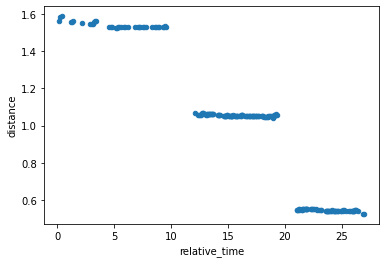

In [92]:
df_filtered_by_change.plot.scatter(x='relative_time', y='distance')

### manual way (probably obsolete)

In [93]:
# the spread of values when rounded
df.distance.round(1).value_counts(normalize=True)

1.1    0.343257
0.5    0.231173
1.5    0.154116
0.6    0.084063
1.0    0.073555
1.6    0.031524
1.4    0.026270
1.2    0.017513
1.3    0.015762
0.9    0.008757
0.8    0.007005
0.7    0.007005
Name: distance, dtype: float64

In [94]:
# input values in meters
input_vals = [1.5,1,0.5]


def get_range(values):
    range = []
    for value in values:
        range.append(value + .1)
        range.append(value)
        range.append(value - .1)
    return range

target = get_range(input_vals)
print(target)

[1.6, 1.5, 1.4, 1.1, 1, 0.9, 0.6, 0.5, 0.4]


In [95]:
target_rows = df.loc[df.distance.round(1).isin(target)]

<AxesSubplot:xlabel='relative_time', ylabel='distance'>

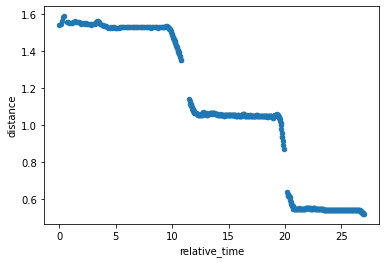

In [96]:
target_rows.plot.scatter(x='relative_time', y='distance')

In [97]:
# the spread of rounded values we want
target_rows.distance.round(1).value_counts(normalize=False)

1.1    196
0.5    132
1.5     88
0.6     48
1.0     42
1.6     18
1.4     15
0.9      5
Name: distance, dtype: int64

In [98]:
target_rows

,distance,relative_time
0,1.540828,0.000000
1,1.544104,0.100539
2,1.560746,0.190374
3,1.584294,0.282790
4,1.586674,0.378646
...,...,...
566,0.525557,26.838087
567,0.522651,26.873688
568,0.526820,26.908928
569,0.525514,26.945567
